In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

### 1D DFT

**Definitions**

$T$: number of time steps

$t$: current time

$x_n$: value of the signal at time $t$

$k$: current frequency (0 Hz ~ T-1 Hz)

$X_k$: result of the DFT, array of complex numbers (amplitude and phase)

**Amplitude** of a certain frequency sine wave (energy).

**Phase offset** of a certain frequency sine wave.

The **amplitude** is retrieved by taking the **absolute value** of the number and the **phase offset** is obtained by computing the **angle** of the number.

---

The DFT is defined as:

$$X_k = \frac{1}{T} \sum_{t = 0}^{T - 1}x_n e^{-2\pi i k t/T}$$

In [1]:
def DFT_1d(x):
    """
    Compute the discrete Fourier Transform of the 1D array x
        x - input signal
    """
    T = x.shape[0]
    t = np.arange(T)
    k = t.reshape((T, 1))
    e = np.exp(-2j * np.pi * k * t / T) # 'j' is the unit imaginary value in python
    return np.dot(e, x)/T

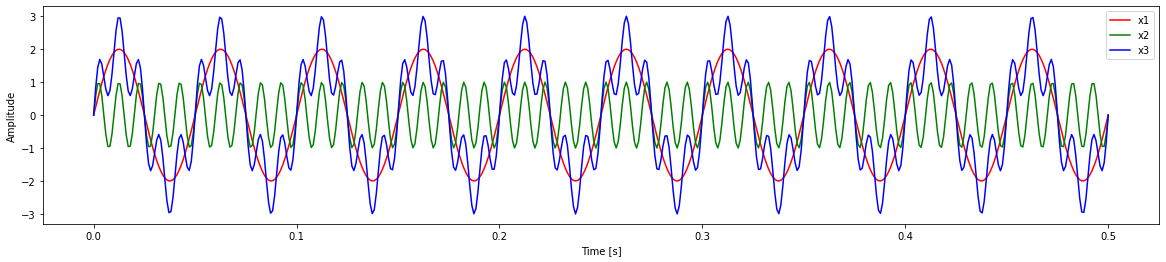

In [3]:
# Construct several sine waves
t = np.linspace(0, 0.5, 500) # time: 0 ~ 0.5, step = 500
x1 = 2 * np.sin(20 * 2 * np.pi * t) # 20 Hz sine wave, amplitude is 2
x2 = np.sin(100 * 2 * np.pi * t) # 100 Hz sine wave
x3 = x1 + x2 # the combination of x1 and x2

plt.figure(figsize=(20,4))
tmp = [x1,x2,x3]
color = ['r', 'g', 'b']
for i in range(3):
    plt.ylabel("Amplitude")
    plt.xlabel("Time [s]")
    plt.plot(t, tmp[i], c=color[i])
plt.legend(['x1','x2','x3'])

Text(0.5, 0, 'Frequency [Hz]')

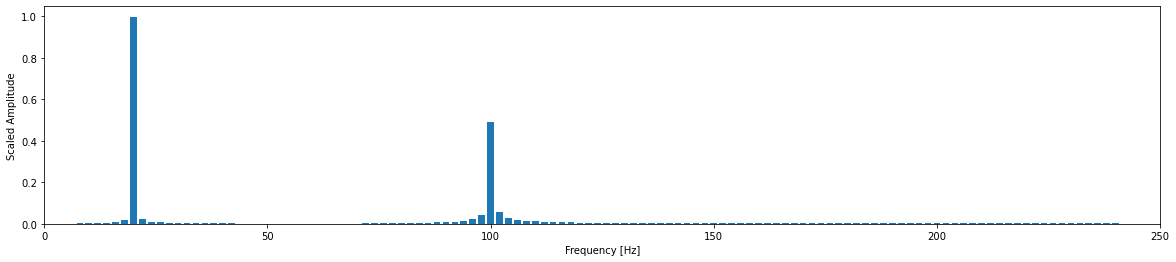

In [4]:
# Fourier transform
x3_dft = DFT_1d(x3)

N = len(x3) # the number of data points
T = t[1] - t[0] # sampling interval
freq = np.linspace(0, 1/T, N) # 1/T is the sampling frequency

A = np.abs(x3_dft) # the amplitude
P = np.angle(x3_dft) # the angle (phase offset)

plt.figure(figsize=(20,4))
plt.bar(freq[:N // 2], A[:N // 2], width=1.5)
plt.xlim(0, N // 2)
plt.ylabel("Scaled Amplitude")
plt.xlabel("Frequency [Hz]")

Text(0.5, 0, 'Frequency [Hz]')

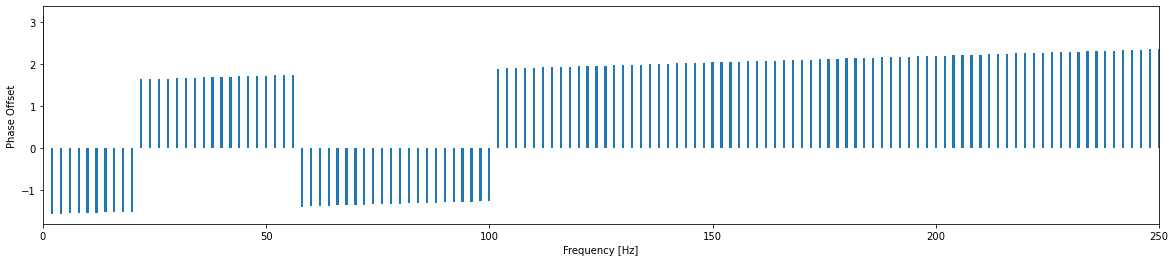

In [5]:
plt.figure(figsize=(20,4))
plt.bar(freq[:N // 2], P[:N // 2], width=.5)
plt.xlim(0, N // 2)
plt.ylabel("Phase Offset")
plt.xlabel("Frequency [Hz]")